In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
df = pd.read_csv('/content/drive/My Drive/dataset.csv')
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [111]:
# Listagem de colunas
df.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [112]:
# Verificação de tipos de dados
df.dtypes

,0
ID_Pedido,object
Data_Pedido,object
ID_Cliente,object
Segmento,object
Pais,object
Cidade,object
Estado,object
ID_Produto,object
Categoria,object
SubCategoria,object


In [113]:
# Listagem de registros duplicados
df[df.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [114]:
# Contando colunas com valores nulos
df.isnull().sum()

,0
ID_Pedido,0
Data_Pedido,0
ID_Cliente,0
Segmento,0
Pais,0
Cidade,0
Estado,0
ID_Produto,0
Categoria,0
SubCategoria,0


## Pergunta 1: Qual a cidade com o maior valor de venda na categoria Office Supplies?

In [115]:
df_os = df[df['Categoria'] == 'Office Supplies']
df_os.shape

(5851, 11)

In [116]:
df_cities = df_os.groupby('Cidade')['Valor_Venda'].sum().sort_values(ascending=False)
df_cities

,Valor_Venda
Cidade,
New York City,68362.814
Los Angeles,47098.100
San Francisco,41771.198
Seattle,34856.878
Philadelphia,29313.687
...,...
Ormond Beach,2.808
Pensacola,2.214
Jupiter,2.064


In [117]:
print('A cidade com maior valor de venda é: ',df_cities.index[0])

A cidade com maior valor de venda é:  New York City


## Pergunta 2: Quais são as 10 cidades com maior valor de venda? Demonstre via gráfico de barras.

<ipython-input-118-30b1dac1f3ca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(


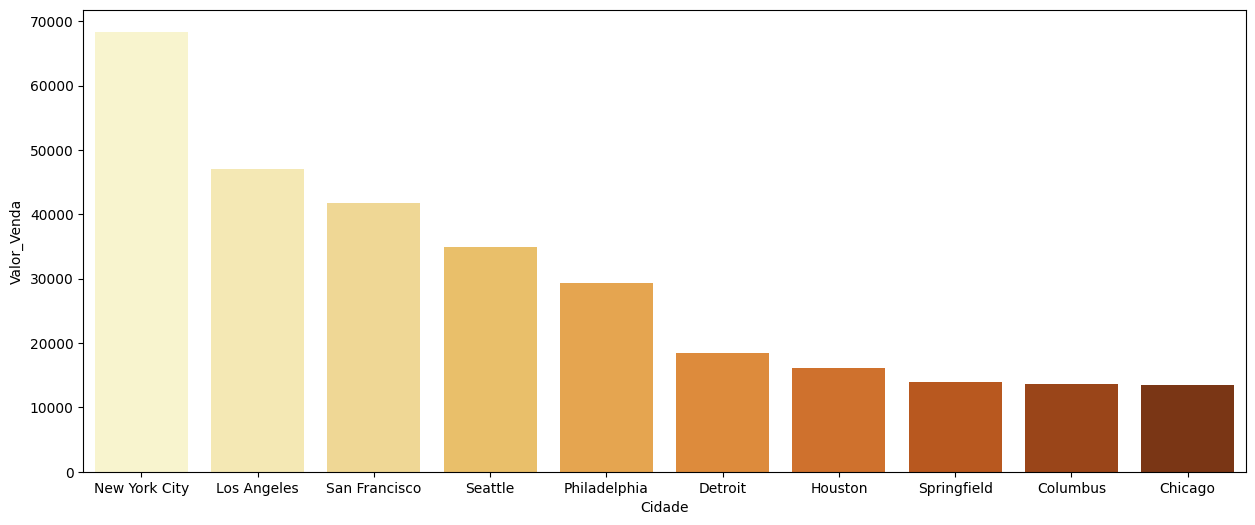

In [118]:
plt.figure(figsize=(15,6))
sb.barplot(
    data=df_cities.to_frame().head(10),
    x='Cidade',
    y= 'Valor_Venda',
    palette='YlOrBr')
plt.show()

## Pergunta 3: Qual o total de vendas por estado? Demonstre via gráfico de barras.

In [119]:
df_estado = df.groupby('Estado')['Valor_Venda'].sum()

<ipython-input-120-5d01ecf8762f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(


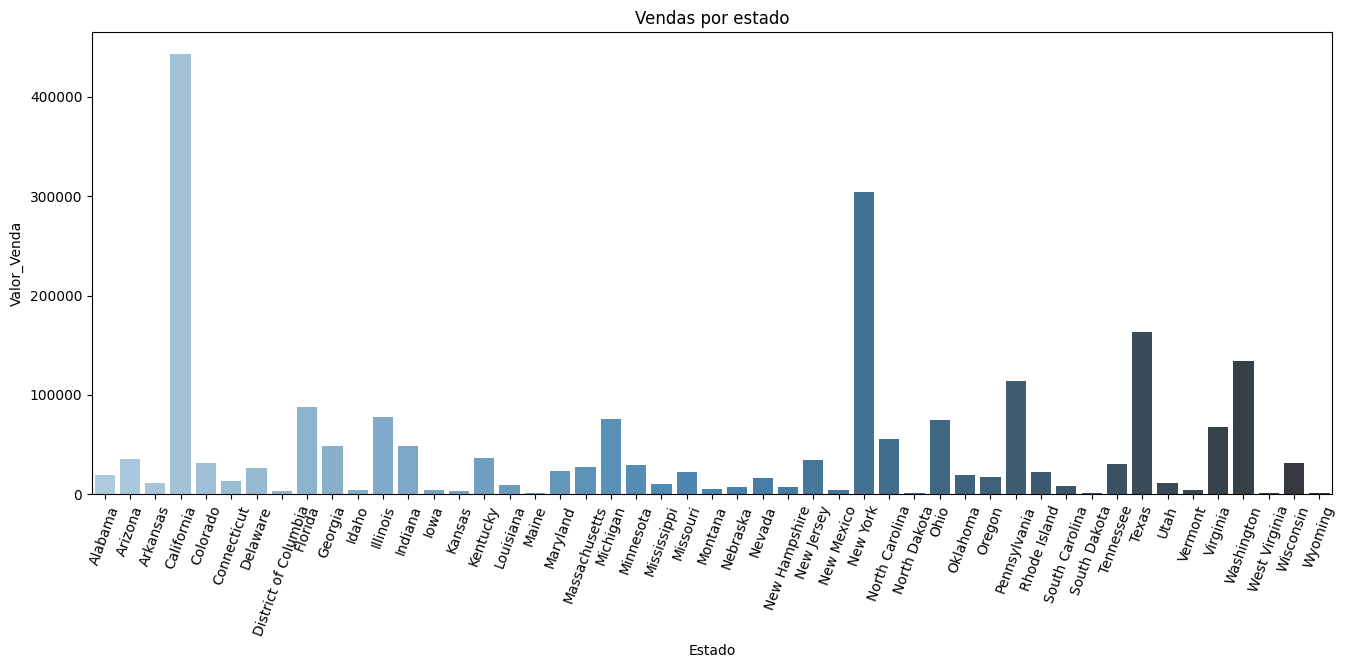

In [120]:
plt.figure(figsize=(16,6))
sb.barplot(
    data=df_estado.to_frame(),
    x='Estado',
    y='Valor_Venda',
    palette='Blues_d'
).set(title='Vendas por estado')
plt.xticks(rotation=70)
plt.show()

## Pergunta 4: Qual segmento teve o maior total de vendas? Demonste via gráfico de pizza.

In [121]:
df_seg = df.groupby('Segmento')['Valor_Venda'].sum().reset_index()
df_seg

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [122]:
from decimal import Decimal
df_seg['Valor_Venda'] = df_seg['Valor_Venda'].apply(lambda x: round(Decimal(x),2))
df_seg

,Segmento,Valor_Venda
0,Consumer,1133834.33
1,Corporate,679232.19
2,Home Office,422491.43


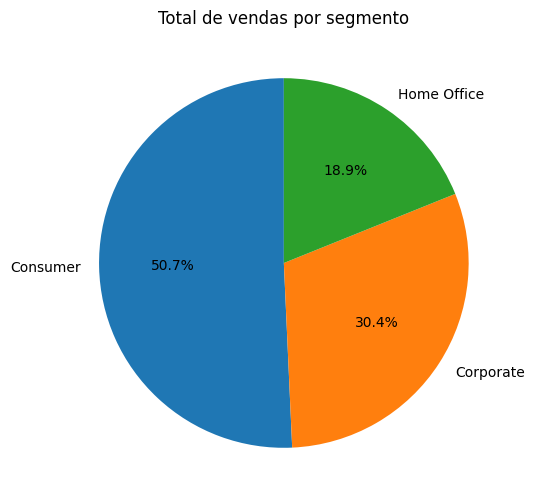

In [123]:
plt.figure(figsize=(15,6))
plt.pie(
    df_seg['Valor_Venda'],
    labels=df_seg['Segmento'],
    startangle=90,
    autopct = '%.1f%%',
    )
plt.title('Total de vendas por segmento')
plt.show()

## Pergunta 5: Qual o total de vendas por segmento por ano?

In [124]:
df['Data_Pedido'] = pd.to_datetime(df['Data_Pedido'], dayfirst=True)
df.dtypes

,0
ID_Pedido,object
Data_Pedido,datetime64[ns]
ID_Cliente,object
Segmento,object
Pais,object
Cidade,object
Estado,object
ID_Produto,object
Categoria,object
SubCategoria,object


In [125]:
df['Ano'] = df['Data_Pedido'].dt.year
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016


In [126]:
df_anoseg = df.groupby(['Ano', 'Segmento'])['Valor_Venda'].sum()
df_anoseg

Ano   Segmento   
2015  Consumer       256719.9166
      Corporate      125819.5957
      Home Office     88229.0878
2016  Consumer       265295.2593
      Corporate      114643.1229
      Home Office     74134.1332
2017  Consumer       288459.5572
      Corporate      203266.7398
      Home Office    103639.6270
2018  Consumer       323359.6019
      Corporate      235502.7284
      Home Office    156488.5849
Name: Valor_Venda, dtype: float64

## Pergunta 6

- Se o valor da venda for maior do que 1000, receberá 15% de desconto
- Se for menor ou igual a 1000, recebe 10% de desconto

**Quantas vendas receberão 15% de desconto?**

In [127]:
df['Desconto'] = np.where(df['Valor_Venda'] > 1000, 0.15, 0.10)
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1


In [128]:
df['Desconto'].value_counts()

,count
Desconto,
0.10,9243
0.15,457


In [129]:
print('457 vendas receberiam 15% de desconto')

457 vendas receberiam 15% de desconto


## Pergunta 7: Qual seria a média do valor das vendas antes e depois do desconto?

In [132]:
df['Valor_Venda'] = round(df['Valor_Venda'],2)
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_Com_Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.96,2017,0.1,235.76400
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.94,2017,0.1,658.74600
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.62,2017,0.1,13.15800
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.58,2016,0.1,861.81975
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.37,2016,0.1,20.13120


In [133]:
df['Valor_Venda_Com_Desconto'] = df['Valor_Venda'] * (1 - df['Desconto'])
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_Com_Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.96,2017,0.1,235.764
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.94,2017,0.1,658.746
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.62,2017,0.1,13.158
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.58,2016,0.1,861.822
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.37,2016,0.1,20.133


In [134]:
# Média das vendas antes do desconto
round(df['Valor_Venda'].mean(),2)

230.47

In [135]:
# Média das vendas após o desconto
round(df['Valor_Venda_Com_Desconto'].mean(),2)

202.44

## Pergunta 8: Qual a média de vendas por segmento, por ano e por mês? Demonstre através de gráfico de linhas.

In [136]:
df['Mes'] = df['Data_Pedido'].dt.month
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_Com_Desconto,Mes
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.96,2017,0.1,235.764,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.94,2017,0.1,658.746,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.62,2017,0.1,13.158,6
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.58,2016,0.1,861.822,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.37,2016,0.1,20.133,10


In [140]:
df_rel = df.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].mean()
df_rel

Ano   Mes  Segmento   
2015  1    Consumer       146.737021
           Corporate      130.886154
           Home Office    329.855882
      2    Consumer       117.328519
           Corporate       69.235556
                             ...    
2018  11   Corporate      341.215385
           Home Office    247.519175
      12   Consumer       183.616221
           Corporate      153.167239
           Home Office    224.524138
Name: Valor_Venda, Length: 144, dtype: float64

In [138]:
# Extraindo níveis
anos = df_rel.index.get_level_values(0)
meses = df_rel.index.get_level_values(1)
segmentos = df_rel.index.get_level_values(2)

<Figure size 1500x600 with 0 Axes>

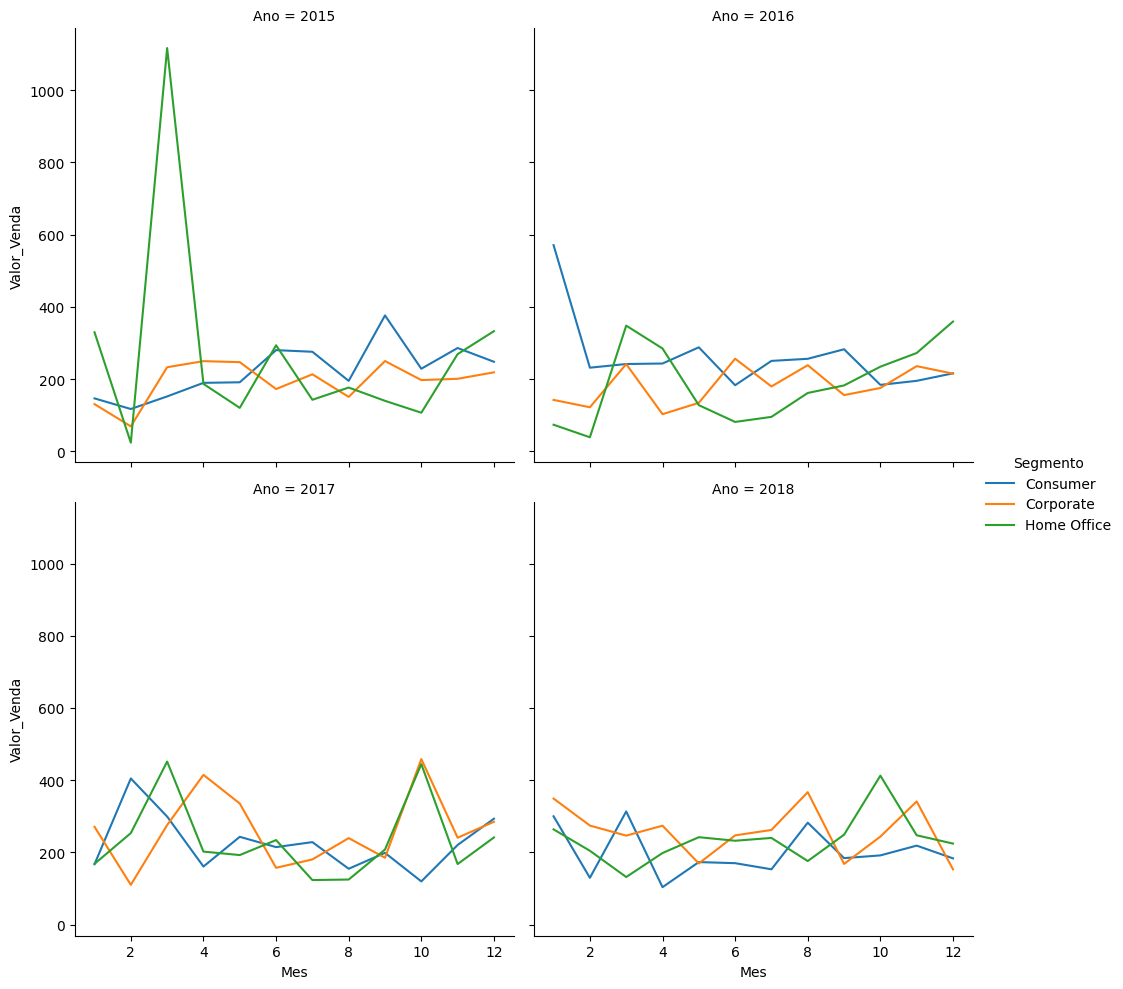

In [142]:
plt.figure(figsize=(15,6))
fig = sb.relplot(
    kind='line',
    data=df_rel.to_frame(),
    y='Valor_Venda',
    x=meses,
    hue=segmentos, # uma linha para cada segmento
    col = anos, # um gráfico para cada ano
    col_wrap = 2
)
plt.show()

## Pergunta 9: Qual o total de vendas por categoria e subcategoria, considerando somente as top 12 subcategorias?

In [151]:
df_sub = df.groupby(['Categoria',
                     'SubCategoria'])['Valor_Venda'].sum(
                         numeric_only=True).sort_values(
                         ascending=False).head(12)
df_sub

Categoria        SubCategoria
Technology       Phones          325271.33
Furniture        Chairs          317919.61
Office Supplies  Storage         216188.34
Furniture        Tables          202083.35
Office Supplies  Binders         194723.34
Technology       Machines        189238.60
                 Accessories     162791.36
                 Copiers         146248.07
Furniture        Bookcases       108045.03
Office Supplies  Appliances      104061.67
Furniture        Furnishings      88862.73
Office Supplies  Paper            76312.80
Name: Valor_Venda, dtype: float64

In [153]:
df_cat = df_sub.groupby('Categoria').sum().reset_index()
df_cat

,Categoria,Valor_Venda
0,Furniture,716910.72
1,Office Supplies,591286.15
2,Technology,823549.36
